# Sugiyakey: drawing Sankey diagrams in Python

In [3]:
import os
import sys
import itertools

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import networkx as nx

sys.path.append(os.path.join('..'))
from sugiyakey import processing, draw, optim

## Basic function

In [ ]:
def draw_sankey_from_flow_table(flow_df, ax=None, method='barycenter_heuristic'):
    dig = processing.get_graph_from_df(flow_df)
    processing.process_directed_graph(dig, method=method)
    draw.draw_sankey(dig, ax=ax)

## Example graph

In [21]:
flow_df = pd.DataFrame(columns=['source', 'target', 'value'])
branch_factor = 3
n_levels = 3
for i_level in range(1, n_levels):
    for i_ln in range(branch_factor**i_level):
        source = str(i_level-1) +'_'+str(int(np.floor(i_ln/branch_factor)))
        target = str(i_level) + '_' + str(i_ln)
        #print((source, target))
        value = branch_factor**(n_levels-i_level-1)
        flow_df.loc[f'{source}->{target}', :] = (source, target, value)
flow_df.loc['Funny', :] = ('funnysource', '1_1', 1)
flow_df.loc['1_1->2_3', 'value'] = 2 # compensation
flow_df

,source,target,value
0_0->1_0,0_0,1_0,3
0_0->1_1,0_0,1_1,3
0_0->1_2,0_0,1_2,3
1_0->2_0,1_0,2_0,1
1_0->2_1,1_0,2_1,1
1_0->2_2,1_0,2_2,1
1_1->2_3,1_1,2_3,2
1_1->2_4,1_1,2_4,1
1_1->2_5,1_1,2_5,1
1_2->2_6,1_2,2_6,1


['b', 'a', 'c']
[1, 2, 3]
Edge crossing before: 7
New relative values: {'a': 1, 'b': 2, 'c': 0}
Edge crossing after: 3
New relative values: {1: 0, 2: 1, 3: 2}
Edge crossing after: 3


(-1.275, 0.37500000000000006, -1.2000000000000002, 25.2)

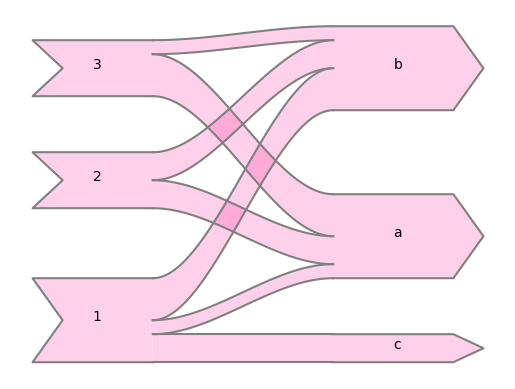

In [27]:
draw_sankey_from_flow_table(flow_df)


## Looping on several examples

In [19]:
import json

csv_example_folder = os.path.join('data', 'csv')
with open(os.path.join(csv_example_folder, 'csv_examples_descriptions.json')) as csv_meta_file:
    csv_metadata = pd.DataFrame(json.load(csv_meta_file))
csv_metadata

,title,file,description
0,Simple space heating,example_flow_tables_space_heating.csv,Simple space heating system with a heat pump a...
1,Simple two-layer graph,example_flow_tables_simple_two_layers.csv,A directed graph with two layers.


['example_flow_tables_simple_three_layers.csv', 'example_flow_tables_simple_two_layers.csv', 'example_flow_tables_space_heating.csv']


example_flow_tables_simple_three_layers.csv


,source,target,value
0,1,a,1
1,2,a,2
2,3,a,3
3,3,b,1
4,2,b,2
5,1,b,3
6,1,c,2
7,1,m1,2
8,2,m1,2
9,m1,c,2


['a', 'c', 'b']
['m2', 'm1']
['2', '1', '3']
We need a dummy node for [('2', 'a'), ('2', 'b'), ('1', 'a'), ('1', 'b'), ('1', 'c'), ('3', 'a'), ('3', 'b')]
Adding Dummy ('2', 'a') 0
Adding Dummy ('2', 'b') 0
Adding Dummy ('1', 'a') 0
Adding Dummy ('1', 'b') 0
Adding Dummy ('1', 'c') 0
Adding Dummy ('3', 'a') 0
Adding Dummy ('3', 'b') 0
Edge crossing before: 20
New relative values: {"Dummy ('1', 'a') 0": 0, "Dummy ('1', 'b') 0": 1, "Dummy ('1', 'c') 0": 2, "Dummy ('2', 'a') 0": 4, "Dummy ('2', 'b') 0": 5, "Dummy ('3', 'a') 0": 6, "Dummy ('3', 'b') 0": 7, 'm1': 3, 'm2': 8}
New relative values: {'a': 2, 'b': 1, 'c': 0}
Edge crossing after: 11
New relative values: {"Dummy ('1', 'a') 0": 5, "Dummy ('1', 'b') 0": 2, "Dummy ('1', 'c') 0": 0, 'm1': 1, "Dummy ('2', 'a') 0": 6, "Dummy ('2', 'b') 0": 3, "Dummy ('3', 'a') 0": 7, "Dummy ('3', 'b') 0": 4, 'm2': 8}
New relative values: {'1': 0, '2': 1, '3': 2}
Edge crossing after: 5


example_flow_tables_simple_two_layers.csv


,source,target,value
0,1,a,1
1,2,a,2
2,3,a,3
3,3,b,1
4,2,b,2
5,1,b,3
6,1,c,2


['b', 'a', 'c']
[1, 2, 3]
Edge crossing before: 7
New relative values: {'a': 1, 'b': 2, 'c': 0}
Edge crossing after: 3
New relative values: {1: 0, 2: 1, 3: 2}
Edge crossing after: 3


example_flow_tables_space_heating.csv


,source,target,value
0,ground,heat pump,3.0
1,PV,electricity,1.5
2,electricity,heat pump,1.0
3,grid,electricity,1.5
4,electricity,HVAX auxiliary,0.2
5,gas,gas boiler,1.1
6,gas boiler,boiler losses,0.1
7,gas boiler,space heating,1.0
8,heat pump,space heating,4.0
9,electricity,domestic electricity use,1.0


['HVAX auxiliary', 'domestic electricity use', 'Feed-in', ' boiler losses', 'space heating']
['heat pump', 'gas boiler']
['electricity', 'ground', 'gas']
['PV', 'grid']
We need a dummy node for [('electricity', 'HVAX auxiliary'), ('electricity', 'domestic electricity use'), ('electricity', 'Feed-in')]
Adding Dummy ('electricity', 'HVAX auxiliary') 0
Adding Dummy ('electricity', 'domestic electricity use') 0
Adding Dummy ('electricity', 'Feed-in') 0
Edge crossing before: 4
New relative values: {'electricity': 0, 'gas': 1, 'ground': 2}
New relative values: {"Dummy ('electricity', 'Feed-in') 0": 0, "Dummy ('electricity', 'HVAX auxiliary') 0": 1, "Dummy ('electricity', 'domestic electricity use') 0": 2, 'gas boiler': 3, 'heat pump': 4}
New relative values: {' boiler losses': 3, 'Feed-in': 0, 'HVAX auxiliary': 1, 'domestic electricity use': 2, 'space heating': 4}
Edge crossing after: 1
New relative values: {"Dummy ('electricity', 'Feed-in') 0": 0, "Dummy ('electricity', 'HVAX auxiliary') 0"

C:\Users\aurel\miniconda3\envs\py39sugi\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\aurel\miniconda3\envs\py39sugi\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


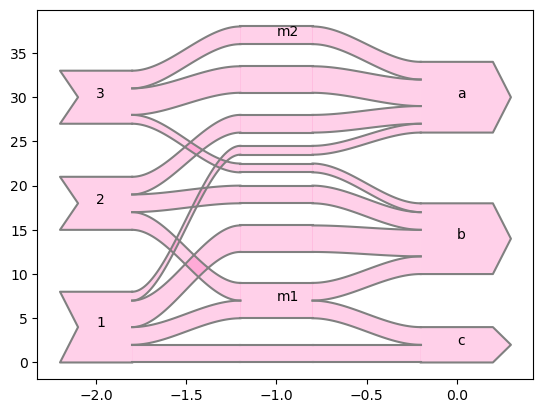

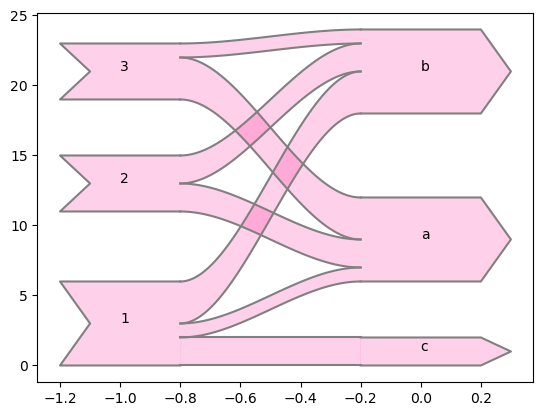

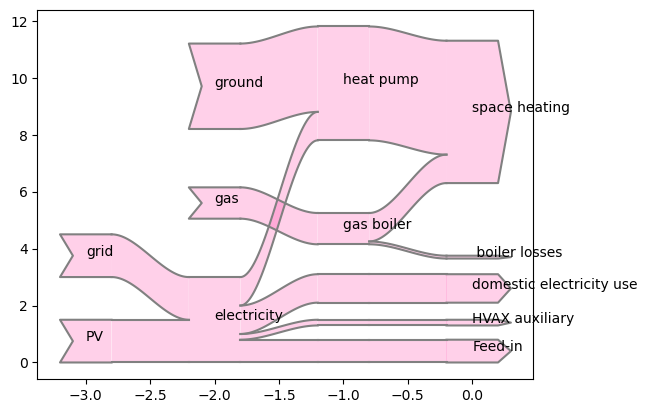

In [23]:

example_files = [item_name for item_name in os.listdir(csv_example_folder) if item_name.endswith('.csv')]
print(example_files)
for exp_file in example_files:
    print('\n\n'+exp_file)
    csv_path = os.path.join(csv_example_folder, exp_file)
    flow_df = pd.read_csv(csv_path)
    display(flow_df)
    draw_sankey_from_flow_table(flow_df)

## Example grid

['HVAX auxiliary', 'domestic electricity use', 'Feed-in', ' boiler losses', 'space heating']
['heat pump', 'gas boiler']
['electricity', 'ground', 'gas']
['PV', 'grid']
We need a dummy node for [('electricity', 'HVAX auxiliary'), ('electricity', 'domestic electricity use'), ('electricity', 'Feed-in')]
Adding Dummy ('electricity', 'HVAX auxiliary') 0
Adding Dummy ('electricity', 'domestic electricity use') 0
Adding Dummy ('electricity', 'Feed-in') 0
Edge crossing before: 4
New relative values: {'electricity': 0, 'gas': 1, 'ground': 2}
New relative values: {"Dummy ('electricity', 'Feed-in') 0": 0, "Dummy ('electricity', 'HVAX auxiliary') 0": 1, "Dummy ('electricity', 'domestic electricity use') 0": 2, 'gas boiler': 3, 'heat pump': 4}
New relative values: {' boiler losses': 3, 'Feed-in': 0, 'HVAX auxiliary': 1, 'domestic electricity use': 2, 'space heating': 4}
Edge crossing after: 1
New relative values: {"Dummy ('electricity', 'Feed-in') 0": 0, "Dummy ('electricity', 'HVAX auxiliary') 0"

C:\Users\aurel\miniconda3\envs\py39sugi\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\aurel\miniconda3\envs\py39sugi\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


['b', 'a', 'c']
[1, 2, 3]
Edge crossing before: 7
New relative values: {'a': 1, 'b': 2, 'c': 0}
Edge crossing after: 3
New relative values: {1: 0, 2: 1, 3: 2}
Edge crossing after: 3
['b', 'a', 'c']
[1, 2, 3]
Edge crossing before: 7
New relative values: {'a': 1, 'b': 2, 'c': 0}
Edge crossing after: 3
New relative values: {1: 0, 2: 1, 3: 2}
Edge crossing after: 3
['b', 'a', 'c']
[1, 2, 3]


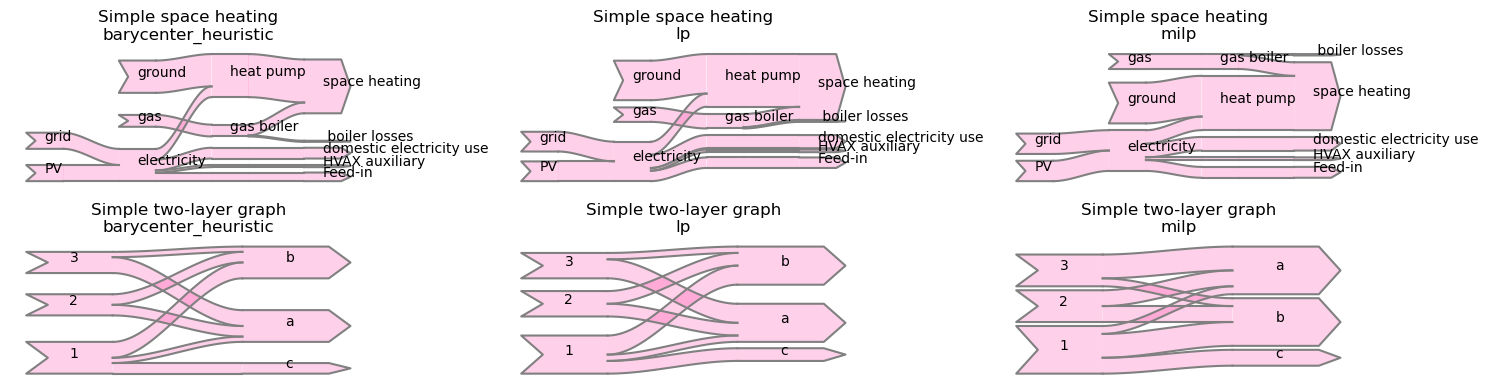

In [30]:
methods = ['barycenter_heuristic', 'lp', 'milp']
n_meths = len(methods)
n_ex = csv_metadata.shape[0]
fig, axs = plt.subplots(n_ex, n_meths, figsize=(5*n_meths, 4))
for i_ex, (exp_title, exp_file) in enumerate(zip(csv_metadata['title'], csv_metadata['file'])):
    csv_path = os.path.join(csv_example_folder, exp_file)
    flow_df = pd.read_csv(csv_path)

    for i_m, method in enumerate(methods):
        draw_sankey_from_flow_table(flow_df, ax=axs[i_ex, i_m], method=method)
        axs[i_ex, i_m].set_title(exp_title+'\n'+method)
        axs[i_ex, i_m].axis(False)
plt.tight_layout()